In [6]:
import os, cv2
import numpy as np

data_dir = '/mnt/hdd1/c-MET_datasets/Lung_c-MET IHC_scored/DL-based_tumor_seg_dataset'

k = 5 
class_pixels = []
for i in range(1, k+1):
    i_fold_train_dir = os.path.join(data_dir, f'{i}-fold', 'train')
    label_list = [f for f in os.listdir(i_fold_train_dir) if 'label' in f]
    tumor, non_tumor = 0, 0
    for label in label_list:
        label_img = cv2.imread(os.path.join(i_fold_train_dir, label), cv2.IMREAD_GRAYSCALE)
        tumor += len(np.where(label_img == 255)[0])
        non_tumor += len(np.where(label_img == 0)[0]) 
        if len(np.where(label_img == 255)[0]) + len(np.where(label_img == 0)[0]) != label_img.shape[0]*label_img.shape[1]:
            print(f'Check the label: {os.path.join(i_fold_train_dir, label)}')
            break
    class_pixels.append((non_tumor, tumor))

In [10]:
class_pixels = np.asarray(class_pixels)
class_pixels

array([[23772391, 45302553],
       [23897478, 45177466],
       [21542464, 47532480],
       [24313908, 44761036],
       [20660211, 48414733]])

In [150]:
np.mean(class_pixels, axis = 0)

array([22837290.4, 46237653.6])

In [151]:
np.mean(class_pixels, axis = 0)[1]/np.mean(class_pixels, axis = 0)[0]

2.024655849714991

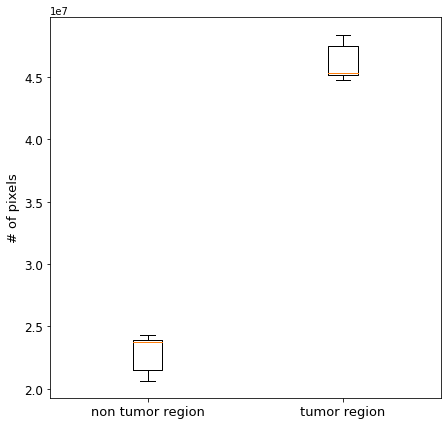

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize = (7, 7))
# plt.title("# of pixels within each region", fontsize = 15)
plt.boxplot(class_pixels, autorange=False, labels = ['non tumor region', 'tumor region'])
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
# plt.ylim(0, 50000000.0)
plt.ylabel("# of pixels", fontsize = 13)
plt.show()

In [47]:
k = 5 
class_pixels_without_non_tissue = []
for i in range(1, k+1):
    i_fold_train_dir = os.path.join(data_dir, f'{i}-fold', 'train')
    label_list = [f for f in os.listdir(i_fold_train_dir) if 'label' in f and 'S-LC' not in f]
    tumor, non_tumor = 0, 0
    for label in label_list:
        label_img = cv2.imread(os.path.join(i_fold_train_dir, label), cv2.IMREAD_GRAYSCALE)
        tumor += len(np.where(label_img == 255)[0])
        non_tumor += len(np.where(label_img == 0)[0]) 
        if len(np.where(label_img == 255)[0]) + len(np.where(label_img == 0)[0]) != label_img.shape[0]*label_img.shape[1]:
            print(f'Check the label: {os.path.join(i_fold_train_dir, label)}')
            break
    class_pixels_without_non_tissue.append((non_tumor, tumor))

In [50]:
class_pixels_without_non_tissue = np.asarray(class_pixels_without_non_tissue)
class_pixels_without_non_tissue

array([[17612007, 45302553],
       [17737094, 45177466],
       [15382080, 47532480],
       [18153524, 44761036],
       [14499827, 48414733]])

In [64]:
np.mean(class_pixels_without_non_tissue, axis = 0)

array([16676906.4, 46237653.6])

In [152]:
np.mean(class_pixels_without_non_tissue, axis = 0)[1]/np.mean(class_pixels_without_non_tissue, axis = 0)[0]

2.772555802076097

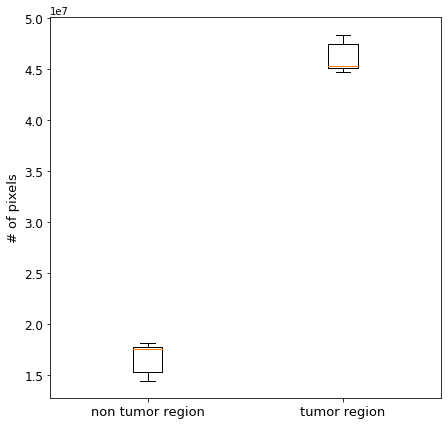

In [149]:
plt.figure(figsize = (7, 7))
# plt.title("# of pixels within each region", fontsize = 15)
plt.boxplot(class_pixels_without_non_tissue, autorange=False, labels = ['non tumor region', 'tumor region'])
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
# plt.ylim(0, 50000000.0)
plt.ylabel("# of pixels", fontsize = 13)
plt.show()

In [85]:
import pandas as pd 
import seaborn as sns

In [129]:
df = pd.DataFrame(columns = ['fold', 'class', '# of pixels'])

for k, p in enumerate(class_pixels):
    for c in range(len(class_pixels[0])):
        if c == 1:
            class_name = 'tumor'
        elif c == 0:
            class_name = 'non tumor' 

        df = df.append({'fold': k+1, 'class': class_name, '# of pixels': p[c]}, ignore_index=True)

In [130]:
df

,fold,class,# of pixels
0,1,non tumor,23772391
1,1,tumor,45302553
2,2,non tumor,23897478
3,2,tumor,45177466
4,3,non tumor,21542464
5,3,tumor,47532480
6,4,non tumor,24313908
7,4,tumor,44761036
8,5,non tumor,20660211
9,5,tumor,48414733


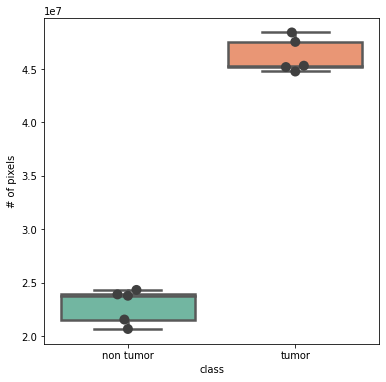

In [148]:
plt.figure(figsize=(6, 6))

ax = sns.boxplot(x = 'class', y= '# of pixels',  data = df, linewidth = 2.5, palette='Set2')
ax = sns.swarmplot(x = 'class', y= '# of pixels', data = df, color=".25", size=10)

plt.show()

In [145]:
ax.get_xlabel

<bound method _AxesBase.get_xlabel of <AxesSubplot:xlabel='class', ylabel='# of pixels'>>